# Show grid search result plots

/home/ubuntu/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


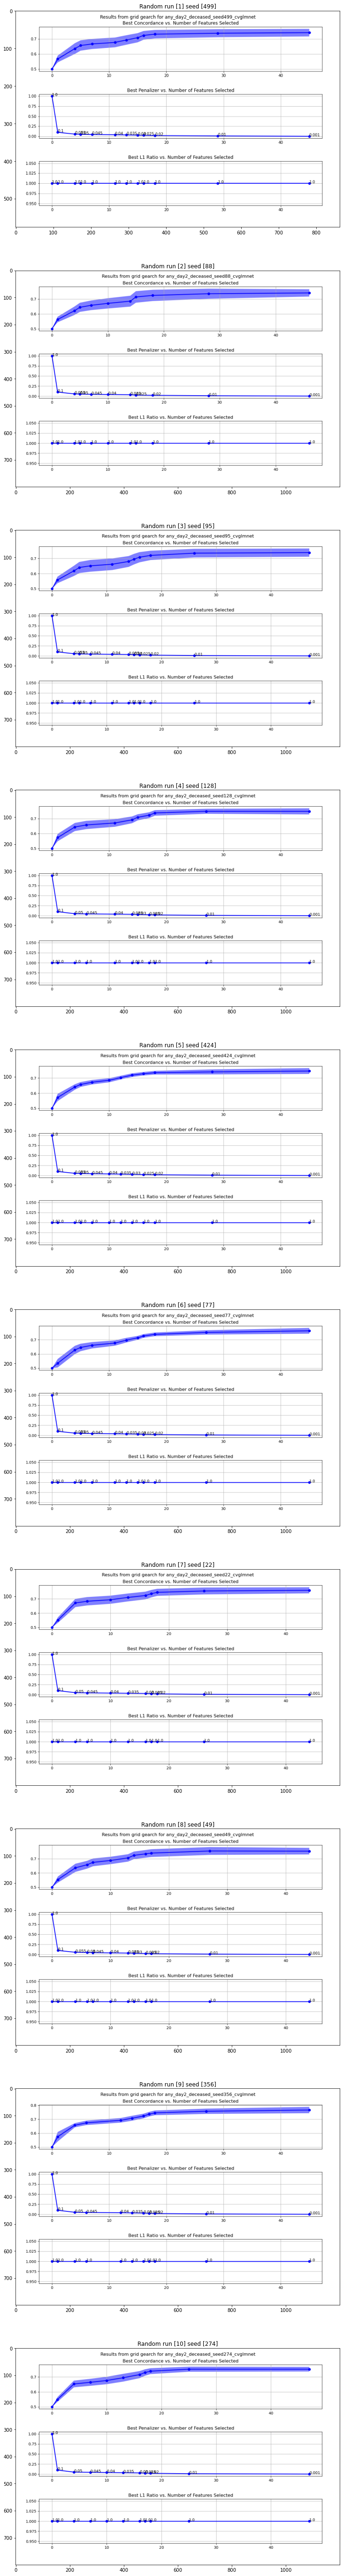

<Figure size 432x288 with 0 Axes>

In [2]:
import os
import pprint
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from lifelines.utils import concordance_index, k_fold_cross_validation
from lifelines import CoxPHFitter, WeibullAFTFitter
from lifelines import KaplanMeierFitter

from sklearn.model_selection import GridSearchCV
from sklearn.utils import resample
import random
from preprocess import get_data
import argparse

# added for variable control
survival_estimator_name = 'glmnet_cox'  # for this file
parser = argparse.ArgumentParser(description='risk score for pn')
parser.add_argument('--outcome', default="deceased", action="store")
parser.add_argument('--prefix', default="any", action="store")
parser.add_argument('--day', type=int, default=2, action="store")
parser.add_argument('--impute', type=int, default=-1, action="store")
parser.add_argument('--seed', type=int, default=42, action="store")
parser.add_argument('--alpha', type=float, default=1.0, action="store")
parser.add_argument('--cross_val_n_folds', type=int, default=5, action="store")
parser.add_argument('--output_dir', default="output", action="store")
args = parser.parse_args("")

outcome = args.outcome
prefix = args.prefix
day = args.day
impute = args.impute  # use MissForest
seed = args.seed
np.random.seed(seed)
random.seed(seed)

cv_glmnet = True
seeds = [499, 88, 95, 128, 424, 77, 22, 49, 356, 274]
plot_path = "plot"

fig,ax = plt.subplots(len(seeds), 1, figsize=(14,10*len(seeds)))
for i, seed in enumerate(seeds):
    goal = "l1_search" if not cv_glmnet else "cvglmnet"
    tag = '{prefix}_day{day}_{outcome}_seed{seed}_{goal}'.format(prefix=prefix, day=day, outcome=outcome, seed=seed, goal=goal)    
    fname = "{}/concordance_plot_{}.png".format(plot_path,tag)
    fi = plt.imread(fname)
    ax[i].imshow(fi)
    ax[i].set_title("Random run [{i}] seed [{s}]".format(i=i+1, s=seed))
plt.show()
plt.savefig("10grid_out.png")

# Best models with penalty 0.025 and 0.02

In [3]:
df_sums = pd.DataFrame({'penalizer':[],
                        'seed':[],
                        'C_train':[],
                        'C_eicu':[],
                        'C_mimic':[],
                        'nfeatures':[],
                        'features':[]})
penalties = [0.025, 0.02]
ft2 = []
ft25 = []
df_fts2 =[]
df_fts25 = []
for i, seed in enumerate(seeds):
    goal = "l1_search" if not cv_glmnet else "cvglmnet"
    tag = '{prefix}_day{day}_{outcome}_seed{seed}_{goal}'.format(prefix=prefix, day=day, outcome=outcome, seed=seed, goal=goal)    
    fname = "{}/{}_summary.pkl".format("models",tag)
    
    with open(fname, 'rb') as fin:
        result = pickle.load(fin)
    for j, penalty in enumerate(penalties):
        ls_st = sorted(result[penalty]['features'])
        features = str(ls_st)
        rst = result[penalty]
        if penalty==0.025:
            ft25.append(ls_st)
            df_fts25.append(rst['df'])
        else:
            ft2.append(ls_st)
            df_fts2.append(rst['df'])
        #print(features)
       
        df2 = pd.DataFrame({'penalizer':penalty,
                        'seed':seed,
                        'C_train':rst['C_train'],
                        'C_eicu':rst['C_eicu:'],
                        'C_mimic':rst['C_mimic'],
                        'nfeatures':rst['nfeatures'],
                        'features':[features]})
        df_sums = df_sums.append(df2, ignore_index=True)
        
print('finished')

finished


## penalty=0.025

In [4]:
pd.options.display.max_colwidth = 250

df_sums.loc[df_sums.penalizer==0.025].reset_index(drop=True)

,penalizer,seed,C_train,C_eicu,C_mimic,nfeatures,features
0,0.025,499.0,0.757837,0.761817,0.757035,16.0,"['age', 'albumin', 'ast', 'bp_mean_arterial', 'bp_systolic', 'bun', 'direct_bilirubin', 'gcs', 'heart_rate', 'neutrophils', 'ph', 'platelets', 'pt', 'rdw', 'sao2', 'troponin']"
1,0.025,88.0,0.759146,0.756829,0.755323,15.0,"['age', 'albumin', 'ast', 'bp_mean_arterial', 'bp_systolic', 'bun', 'direct_bilirubin', 'gcs', 'heart_rate', 'ph', 'platelets', 'pt', 'rdw', 'sao2', 'troponin']"
2,0.025,95.0,0.757985,0.762114,0.753616,16.0,"['age', 'albumin', 'ast', 'bp_mean_arterial', 'bp_systolic', 'bun', 'direct_bilirubin', 'gcs', 'heart_rate', 'neutrophils', 'ph', 'platelets', 'pt', 'rdw', 'sao2', 'troponin']"
3,0.025,128.0,0.755829,0.763699,0.758757,17.0,"['age', 'albumin', 'ast', 'bp_diastolic', 'bp_mean_arterial', 'bp_systolic', 'bun', 'direct_bilirubin', 'gcs', 'heart_rate', 'neutrophils', 'ph', 'platelets', 'pt', 'rdw', 'sao2', 'troponin']"
4,0.025,424.0,0.756355,0.760231,0.757065,16.0,"['age', 'albumin', 'ast', 'bp_mean_arterial', 'bp_systolic', 'bun', 'direct_bilirubin', 'gcs', 'heart_rate', 'neutrophils', 'ph', 'platelets', 'pt', 'rdw', 'sao2', 'troponin']"
5,0.025,77.0,0.756350,0.757126,0.752899,16.0,"['age', 'albumin', 'ast', 'bp_mean_arterial', 'bp_systolic', 'bun', 'direct_bilirubin', 'gcs', 'heart_rate', 'neutrophils', 'ph', 'platelets', 'pt', 'rdw', 'sao2', 'troponin']"
6,0.025,22.0,0.756432,0.763006,0.758465,17.0,"['age', 'albumin', 'ast', 'bp_diastolic', 'bp_mean_arterial', 'bp_systolic', 'bun', 'direct_bilirubin', 'gcs', 'heart_rate', 'neutrophils', 'ph', 'platelets', 'pt', 'rdw', 'sao2', 'troponin']"
7,0.025,49.0,0.756551,0.762213,0.754873,16.0,"['age', 'albumin', 'ast', 'bp_mean_arterial', 'bp_systolic', 'bun', 'direct_bilirubin', 'gcs', 'heart_rate', 'neutrophils', 'ph', 'platelets', 'pt', 'rdw', 'sao2', 'troponin']"
8,0.025,356.0,0.756427,0.761354,0.756425,17.0,"['age', 'albumin', 'ast', 'bp_diastolic', 'bp_mean_arterial', 'bp_systolic', 'bun', 'direct_bilirubin', 'gcs', 'heart_rate', 'neutrophils', 'ph', 'platelets', 'pt', 'rdw', 'sao2', 'troponin']"
9,0.025,274.0,0.759261,0.758877,0.756360,17.0,"['age', 'albumin', 'ast', 'bp_diastolic', 'bp_mean_arterial', 'bp_systolic', 'bun', 'direct_bilirubin', 'gcs', 'heart_rate', 'neutrophils', 'ph', 'platelets', 'pt', 'rdw', 'sao2', 'troponin']"


## penalty=0.2

In [5]:
df_sums.loc[df_sums.penalizer==0.02].reset_index(drop=True)

,penalizer,seed,C_train,C_eicu,C_mimic,nfeatures,features
0,0.02,499.0,0.766530,0.768984,0.765310,18.0,"['age', 'albumin', 'ast', 'bp_diastolic', 'bp_mean_arterial', 'bp_systolic', 'bun', 'direct_bilirubin', 'gcs', 'heart_rate', 'neutrophils', 'ph', 'platelets', 'pt', 'rdw', 'sao2', 'troponin', 'wbc']"
1,0.02,88.0,0.767586,0.764030,0.763458,18.0,"['age', 'albumin', 'ast', 'bp_diastolic', 'bp_mean_arterial', 'bp_systolic', 'bun', 'direct_bilirubin', 'gcs', 'heart_rate', 'neutrophils', 'ph', 'platelets', 'pt', 'rdw', 'sao2', 'troponin', 'wbc']"
2,0.02,95.0,0.766769,0.767927,0.762366,18.0,"['age', 'albumin', 'ast', 'bp_diastolic', 'bp_mean_arterial', 'bp_systolic', 'bun', 'direct_bilirubin', 'gcs', 'heart_rate', 'neutrophils', 'ph', 'platelets', 'pt', 'rdw', 'sao2', 'troponin', 'wbc']"
3,0.02,128.0,0.764269,0.769612,0.767094,18.0,"['age', 'albumin', 'ast', 'bp_diastolic', 'bp_mean_arterial', 'bp_systolic', 'bun', 'direct_bilirubin', 'gcs', 'heart_rate', 'neutrophils', 'ph', 'platelets', 'pt', 'rdw', 'sao2', 'troponin', 'wbc']"
4,0.02,424.0,0.764714,0.766210,0.765892,18.0,"['age', 'albumin', 'ast', 'bp_diastolic', 'bp_mean_arterial', 'bp_systolic', 'bun', 'direct_bilirubin', 'gcs', 'heart_rate', 'neutrophils', 'ph', 'platelets', 'pt', 'rdw', 'sao2', 'troponin', 'wbc']"
5,0.02,77.0,0.765612,0.764955,0.761938,18.0,"['age', 'albumin', 'ast', 'bp_diastolic', 'bp_mean_arterial', 'bp_systolic', 'bun', 'direct_bilirubin', 'gcs', 'heart_rate', 'neutrophils', 'ph', 'platelets', 'pt', 'rdw', 'sao2', 'troponin', 'wbc']"
6,0.02,22.0,0.765163,0.769182,0.766332,18.0,"['age', 'albumin', 'ast', 'bp_diastolic', 'bp_mean_arterial', 'bp_systolic', 'bun', 'direct_bilirubin', 'gcs', 'heart_rate', 'neutrophils', 'ph', 'platelets', 'pt', 'rdw', 'sao2', 'troponin', 'wbc']"
7,0.02,49.0,0.764733,0.770041,0.763810,17.0,"['age', 'albumin', 'ast', 'bp_mean_arterial', 'bp_systolic', 'bun', 'direct_bilirubin', 'gcs', 'heart_rate', 'neutrophils', 'ph', 'platelets', 'pt', 'rdw', 'sao2', 'troponin', 'wbc']"
8,0.02,356.0,0.765249,0.766672,0.764455,18.0,"['age', 'albumin', 'ast', 'bp_diastolic', 'bp_mean_arterial', 'bp_systolic', 'bun', 'direct_bilirubin', 'gcs', 'heart_rate', 'neutrophils', 'ph', 'platelets', 'pt', 'rdw', 'sao2', 'troponin', 'wbc']"
9,0.02,274.0,0.767930,0.765384,0.764827,18.0,"['age', 'albumin', 'ast', 'bp_diastolic', 'bp_mean_arterial', 'bp_systolic', 'bun', 'direct_bilirubin', 'gcs', 'heart_rate', 'neutrophils', 'ph', 'platelets', 'pt', 'rdw', 'sao2', 'troponin', 'wbc']"


## per feature, what fraction of the 10 experiments the feature is selected by lasso/elastic-net.

In [6]:
def get_num_features(df_sums, penalizer, ft2, df_fts2):
    df2 = df_sums.loc[df_sums.penalizer==0.02].reset_index(drop=True)
    all_fts2 = sorted([i for j in ft2 for i in j])
    unique_features = sorted(np.unique(np.array(all_fts2)))
    features_perc = {}
    dist = {}
    # for each unique features
    for i, f in enumerate(unique_features):
        
        count = 0
        # for getting counts
        for j, nonzeros in enumerate(ft2):
            #print(nonzeros)
            count = count + 1 if f in nonzeros else count
            
            #print(f,j%10,count)
        features_perc[f] = count
        
        # for getting distributions
        f_coefs = []
        for r, df_coefs in enumerate(df_fts2):
            if f in df_coefs.features.values:
                print('f',f, df_coefs.loc[df_coefs.features==f])
                f_coefs.append(df_coefs.loc[df_coefs.features==f]['coefs'].values.item())
        dist[f] = f_coefs
    return features_perc, dist
features_perc2, fdist2= get_num_features(df_sums, 0.02, ft2, df_fts2)
features_perc25, fdist25= get_num_features(df_sums, 0.025, ft25, df_fts25)



#print(features_perc2, '\n')
#print(features_perc25)
xticks2  = []
xticks25 = []
ft_dic2 = {}
ft_dic25= {}
print("sort for penalty 0.02")
for key, value in sorted(features_perc2.items(), key=lambda item: item[1], reverse=True):
    print("%s: %s" % (key, value))
    ft_dic2[key] = fdist2[key]
    xticks2.append("{}\n({})".format(key, value))
    
print("\nsort for penalty 0.025")
for key, value in sorted(features_perc25.items(), key=lambda item: item[1], reverse=True):
    print("%s: %s" % (key, value))
    ft_dic25[key]= fdist25[key]
    xticks25.append("{}\n({})".format(key, value))

f age    features     coefs
11      age  0.198162
f age    features    coefs
11      age  0.19802
f age    features     coefs
11      age  0.196268
f age    features     coefs
11      age  0.194321
f age    features     coefs
11      age  0.193172
f age    features     coefs
11      age  0.197781
f age    features    coefs
11      age  0.19272
f age    features     coefs
11      age  0.200317
f age    features     coefs
11      age  0.193196
f age    features     coefs
11      age  0.196398
f albumin   features     coefs
7  albumin -0.046846
f albumin   features     coefs
7  albumin -0.045047
f albumin   features     coefs
7  albumin -0.046546
f albumin   features     coefs
7  albumin -0.048062
f albumin   features     coefs
7  albumin -0.035606
f albumin   features     coefs
7  albumin -0.042159
f albumin   features     coefs
7  albumin -0.052342
f albumin   features     coefs
7  albumin -0.047589
f albumin   features     coefs
7  albumin -0.042187
f albumin   features     coefs
7  al

f bp_diastolic         features     coefs
15  bp_diastolic -0.003652
f bp_diastolic         features     coefs
15  bp_diastolic -0.015693
f bp_diastolic         features     coefs
15  bp_diastolic -0.005879
f bp_mean_arterial             features     coefs
15  bp_mean_arterial -0.066243
f bp_mean_arterial             features     coefs
14  bp_mean_arterial -0.069584
f bp_mean_arterial             features     coefs
15  bp_mean_arterial -0.069269
f bp_mean_arterial             features     coefs
16  bp_mean_arterial -0.060477
f bp_mean_arterial             features  coefs
15  bp_mean_arterial -0.077
f bp_mean_arterial             features     coefs
15  bp_mean_arterial -0.065692
f bp_mean_arterial             features     coefs
16  bp_mean_arterial -0.081874
f bp_mean_arterial             features     coefs
15  bp_mean_arterial -0.064189
f bp_mean_arterial             features     coefs
16  bp_mean_arterial -0.064583
f bp_mean_arterial             features     coefs
16  bp_mean_arterial

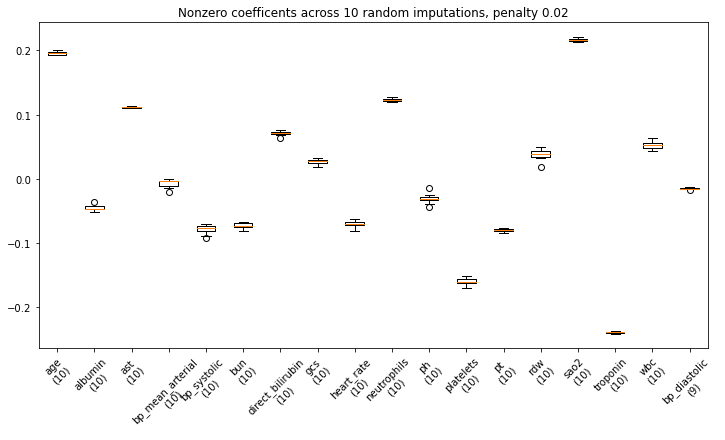

In [14]:
fig, axes = plt.subplots(figsize=(12,6))
axes.boxplot(fdist2.values())
axes.set_xticklabels(xticks2, rotation=45)
axes.set_title("Nonzero coefficents across 10 random imputations, penalty 0.02")
fname = "{}/coefficients_10runs_0.02.png".format(plot_path,tag)
fig.savefig(fname, dpi=300)

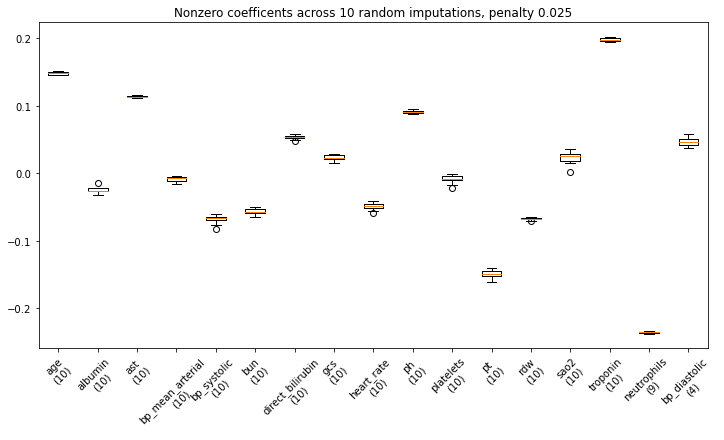

In [13]:
fig, axes = plt.subplots(figsize=(12,6))
axes.boxplot(fdist25.values())
axes.set_xticklabels(xticks25, rotation=45)
axes.set_title("Nonzero coefficents across 10 random imputations, penalty 0.025")
fname = "{}/coefficients_10runs_0.025.png".format(plot_path,tag)
fig.savefig(fname, dpi=300)

# Get distribution per feature

In [9]:
df_fts25[0].loc[df_fts25[0].features=="ph"]['coefs'].values.item()
exist = True if "ph" in df_fts25[0].features.values else False
print(exist)

True
